In [1337]:
#from https://www.tensorflow.org/quantum/tutorials/quantum_data

import cirq
import sympy
import numpy as np
import tensorflow as tf
import tensorflow_quantum as tfq

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
#np.random.seed(1234)

In [1346]:
from sklearn.datasets import make_regression, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X, y = fetch_california_housing(return_X_y=True, as_frame=False)

idx = np.random.choice(len(X), int(len(X) * 0.04), replace=False)


X = X[idx]
y = y[idx]




#diabetes = load_diabetes()
#X, y = diabetes.data, diabetes.target


#X, y = make_friedman1(n_samples=500, n_features=13, noise=1.)
#X, y = make_friedman2(n_samples=500)

#X, y =make_regression(n_samples=500, n_features=13)


scaler = MinMaxScaler()
X =scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()


#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
#x_train, x_test = x_train/255.0, x_test/255.0




print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 701
Number of original test examples: 124


In [1348]:
X.shape

(825, 8)

In [1339]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/Users/davidvondollen/opt/anaconda3/envs/quantum-data/lib/python3.8/site-packages/pkg_resources/__init__.py'>

In [1340]:
import cirq
import sympy
import numpy as np
import tensorflow as tf
import tensorflow_quantum as tfq

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
np.random.seed(1234)

In [1312]:
def filter_03(x, y):
    keep = (y == 0) | (y == 3)
    x, y = x[keep], y[keep]
    y = y == 0
    return x,y



In [1313]:
#x_train, y_train = filter_03(x_train, y_train)
#x_test, y_test = filter_03(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 425
Number of filtered test examples: 75


In [1314]:
#print(y_train[0])

#plt.imshow(x_train[0, :, :])
#plt.colorbar()

In [1315]:
def truncate_x(x_train, x_test, n_components=10):
  """Perform PCA on image dataset keeping the top `n_components` components."""
  n_points_train = tf.gather(tf.shape(x_train), 0)
  n_points_test = tf.gather(tf.shape(x_test), 0)

  # Flatten to 1D
  x_train = tf.reshape(x_train, [n_points_train, -1])
  x_test = tf.reshape(x_test, [n_points_test, -1])

  # Normalize.
  feature_mean = tf.reduce_mean(x_train, axis=0)
  x_train_normalized = x_train - feature_mean
  x_test_normalized = x_test - feature_mean

  # Truncate.
  e_values, e_vectors = tf.linalg.eigh(
      tf.einsum('ji,jk->ik', x_train_normalized, x_train_normalized))
  return tf.einsum('ij,jk->ik', x_train_normalized, e_vectors[:,-n_components:]), \
    tf.einsum('ij,jk->ik', x_test_normalized, e_vectors[:, -n_components:])

In [1316]:
DATASET_DIM = 10
x_train, x_test = truncate_x(x_train, x_test, n_components=DATASET_DIM)
print(f'New datapoint dimension:', len(x_train[0]))

New datapoint dimension: 10


In [1317]:



#N_TRAIN = 1000
#N_TEST = 200

N_TRAIN = len(x_train)
N_TEST = len(x_test)

x_train, x_test = x_train[:N_TRAIN], x_test[:N_TEST]
y_train, y_test = y_train[:N_TRAIN], y_test[:N_TEST]

#N_TRAIN = 1000
#N_TEST = 200



    

    
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train.reshape(-1,1))

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))

y_test
          

array([[5.77514590e-01],
       [5.86090536e-01],
       [3.90044728e-01],
       [6.11897731e-01],
       [3.89455272e-01],
       [7.18930835e-01],
       [4.08673794e-01],
       [4.01850883e-01],
       [6.74639195e-04],
       [4.86270756e-01],
       [7.49963311e-01],
       [8.26977440e-01],
       [6.20884817e-01],
       [6.98484953e-01],
       [4.32303504e-01],
       [6.27635275e-01],
       [3.10898896e-01],
       [5.38856216e-01],
       [5.86148096e-01],
       [3.91520457e-01],
       [8.75061636e-01],
       [4.39151989e-01],
       [7.41162274e-01],
       [6.19229016e-01],
       [0.00000000e+00],
       [5.71063346e-01],
       [4.73326966e-01],
       [7.27868778e-01],
       [3.83222413e-01],
       [6.76125667e-01],
       [5.17206454e-01],
       [4.44629681e-01],
       [7.02646461e-01],
       [7.62253797e-01],
       [4.92656018e-01],
       [8.16968951e-01],
       [4.36168953e-01],
       [6.69255565e-01],
       [8.01830786e-01],
       [5.01697442e-01],


In [1318]:
def single_qubit_wall(qubits, rotations):
  """Prepare a single qubit X,Y,Z rotation wall on `qubits`."""
  wall_circuit = cirq.Circuit()
  for i, qubit in enumerate(qubits):
    for j, gate in enumerate([cirq.X, cirq.Y, cirq.Z]):
      wall_circuit.append(gate(qubit) ** rotations[i][j])

  return wall_circuit

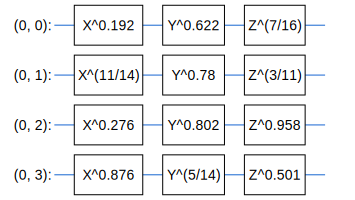

In [1319]:
SVGCircuit(single_qubit_wall(
    cirq.GridQubit.rect(1,4), np.random.uniform(size=(4, 3))))

In [1320]:
def v_theta(qubits):
  """Prepares a circuit that generates V(\theta)."""
  ref_paulis = [
      cirq.X(q0) * cirq.X(q1) + \
      cirq.Y(q0) * cirq.Y(q1) + \
      cirq.Z(q0) * cirq.Z(q1) for q0, q1 in zip(qubits, qubits[1:])
  ]
  exp_symbols = list(sympy.symbols('ref_0:'+str(len(ref_paulis))))
  return tfq.util.exponential(ref_paulis, exp_symbols), exp_symbols

Symbols found in circuit:[ref_0]


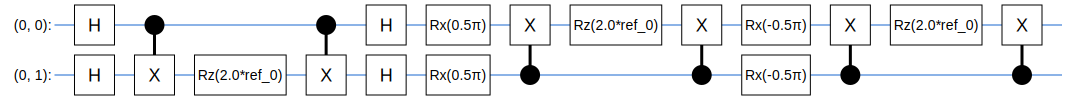

In [1321]:
test_circuit, test_symbols = v_theta(cirq.GridQubit.rect(1, 2))
print(f'Symbols found in circuit:{test_symbols}')
SVGCircuit(test_circuit)

In [1322]:
def prepare_pqk_circuits(qubits, classical_source, n_trotter=8):
  """Prepare the pqk feature circuits around a dataset."""
  n_qubits = len(qubits)
  n_points = len(classical_source)

  # Prepare random single qubit rotation wall.
  random_rots = np.random.uniform(-2, 2, size=(n_qubits, 3))
  initial_U = single_qubit_wall(qubits, random_rots)

  # Prepare parametrized V
  V_circuit, symbols = v_theta(qubits)
  exp_circuit = cirq.Circuit(V_circuit for t in range(n_trotter))

  # Convert to `tf.Tensor`
  initial_U_tensor = tfq.convert_to_tensor([initial_U])
  initial_U_splat = tf.tile(initial_U_tensor, [n_points])

  full_circuits = tfq.layers.AddCircuit()(
      initial_U_splat, append=exp_circuit)
  # Replace placeholders in circuits with values from `classical_source`.
  return tfq.resolve_parameters(
      full_circuits, tf.convert_to_tensor([str(x) for x in symbols]),
      tf.convert_to_tensor(classical_source*(n_qubits/3)/n_trotter))

In [1323]:
qubits = cirq.GridQubit.rect(1, DATASET_DIM + 1)
q_x_train_circuits = prepare_pqk_circuits(qubits, x_train)
q_x_test_circuits = prepare_pqk_circuits(qubits, x_test)

In [1324]:
def get_pqk_features(qubits, data_batch):
  """Get PQK features based on above construction."""
  ops = [[cirq.X(q), cirq.Y(q), cirq.Z(q)] for q in qubits]
  ops_tensor = tf.expand_dims(tf.reshape(tfq.convert_to_tensor(ops), -1), 0)
  batch_dim = tf.gather(tf.shape(data_batch), 0)
  ops_splat = tf.tile(ops_tensor, [batch_dim, 1])
  exp_vals = tfq.layers.Expectation()(data_batch, operators=ops_splat)
  rdm = tf.reshape(exp_vals, [batch_dim, len(qubits), -1])
  return rdm

In [1325]:
x_train_pqk = get_pqk_features(qubits, q_x_train_circuits)
x_test_pqk = get_pqk_features(qubits, q_x_test_circuits)
print('New PQK training dataset has shape:', x_train_pqk.shape)
print('New PQK testing dataset has shape:', x_test_pqk.shape)

New PQK training dataset has shape: (425, 11, 3)
New PQK testing dataset has shape: (75, 11, 3)


In [1326]:
def compute_kernel_matrix(vecs, gamma):
  """Computes d[i][j] = e^ -gamma * (vecs[i] - vecs[j]) ** 2 """
  scaled_gamma = gamma / (
      tf.cast(tf.gather(tf.shape(vecs), 1), tf.float32) * tf.math.reduce_std(vecs))
  return scaled_gamma * tf.einsum('ijk->ij',(vecs[:,None,:] - vecs) ** 2)

def get_spectrum(datapoints, gamma=1.0):
  """Compute the eigenvalues and eigenvectors of the kernel of datapoints."""
  KC_qs = compute_kernel_matrix(datapoints, gamma)
  S, V = tf.linalg.eigh(KC_qs)
  S = tf.math.abs(S)
  return S, V

In [1327]:
S_pqk, V_pqk = get_spectrum(
    tf.reshape(tf.concat([x_train_pqk, x_test_pqk], 0), [-1, len(qubits) * 3]))

S_original, V_original = get_spectrum(
    tf.cast(tf.concat([x_train, x_test], 0), tf.float32), gamma=0.2)

print('Eigenvectors of pqk kernel matrix:', V_pqk)
print('Eigenvectors of original kernel matrix:', V_original)

Eigenvectors of pqk kernel matrix: tf.Tensor(
[[-0.02433182  0.04793513  0.0374992  ...  0.08564785 -0.02227794
   0.03765634]
 [-0.03234835  0.02975667 -0.00425568 ... -0.00077279  0.6798687
   0.04212114]
 [-0.01947668  0.05076632 -0.0831014  ... -0.16815831  0.04342926
   0.04393488]
 ...
 [ 0.06786648  0.00317618  0.06054138 ...  0.01365719  0.0075105
   0.05049017]
 [ 0.08276161  0.03092082  0.07658009 ...  0.06614178  0.12338011
   0.05384719]
 [ 0.07770849 -0.03080515  0.04218074 ...  0.01179587  0.03510402
   0.04923963]], shape=(500, 500), dtype=float32)
Eigenvectors of original kernel matrix: tf.Tensor(
[[-2.9958140e-02 -9.0385959e-02 -4.7754139e-02 ... -2.0535247e-02
  -7.2509754e-03  5.5906795e-02]
 [-8.0285117e-02  2.5164124e-02  8.7694107e-03 ...  1.6281329e-03
  -7.8561580e-01  4.4480763e-02]
 [ 4.1180342e-02  1.5969987e-03 -4.2675011e-02 ... -6.9749445e-02
  -2.8297718e-04  5.4256044e-02]
 ...
 [ 1.9164132e-02 -6.3298099e-02  6.7800120e-02 ...  7.4218862e-02
   6.220642

In [1328]:
def get_stilted_dataset(S, V, S_2, V_2, lambdav=0.1):
    """Prepare new labels that maximize geometric distance between kernels."""
    S_diag = tf.linalg.diag(S ** 0.5)
    S_2_diag = tf.linalg.diag(S_2 / (S_2 + lambdav) ** 2)
    scaling = S_diag @ tf.transpose(V) @ \
            V_2 @ S_2_diag @ tf.transpose(V_2) @ \
            V @ S_diag
    #print(scaling)
  # Generate new lables using the largest eigenvector.
    _, vecs = tf.linalg.eig(scaling)
    #print(vecs) 
    new_labels = tf.math.real(
      tf.einsum('ij,j->i', tf.cast(V @ S_diag, tf.complex64), vecs[-1])).numpy()
    #print("labels: ", new_labels)
    # Create new labels and add some small amount of noise.
    #final_y = new_labels > np.median(new_labels)
    #noisy_y = (final_y ^ (np.random.uniform(size=final_y.shape) > 0.95))
    new_labels= new_labels.reshape(-1,1)
    #noisy_y = new_labels
    noisy_y = (new_labels + (np.random.randn(new_labels.shape[0],new_labels.shape[1]) *0.001))
    return noisy_y

In [1329]:
y_relabel = get_stilted_dataset(S_pqk, V_pqk, S_original, V_original)
y_relabel = scaler.fit_transform(y_relabel.reshape(-1,1))
y_train_new, y_test_new = y_relabel[:N_TRAIN], y_relabel[N_TRAIN:]
print(y_relabel)

[[0.87211824]
 [0.78275836]
 [0.7816399 ]
 [0.79264148]
 [0.70917288]
 [0.87526657]
 [0.58667259]
 [0.78606343]
 [0.65904814]
 [0.90781052]
 [0.9322312 ]
 [0.8433193 ]
 [0.7156281 ]
 [0.77223842]
 [0.81892785]
 [0.71618095]
 [0.90139798]
 [0.65832647]
 [0.93146424]
 [0.86965837]
 [0.91623033]
 [0.94632368]
 [0.90472125]
 [0.93522544]
 [0.92758355]
 [0.97721192]
 [0.8968815 ]
 [0.97577891]
 [0.95358646]
 [0.89751159]
 [0.86278625]
 [0.7217305 ]
 [0.93505381]
 [0.80447134]
 [0.95496223]
 [0.45369337]
 [0.93704434]
 [0.92860793]
 [0.89992021]
 [0.74286006]
 [0.60463982]
 [0.83451435]
 [0.81012432]
 [0.91070621]
 [0.77720341]
 [0.89257001]
 [0.9404156 ]
 [0.90503309]
 [0.8825368 ]
 [0.87444428]
 [0.83397448]
 [0.84763079]
 [0.80940607]
 [0.94378749]
 [0.89758319]
 [0.9513946 ]
 [0.82050639]
 [0.57783831]
 [0.9255022 ]
 [0.97583016]
 [0.40701432]
 [0.7470797 ]
 [0.68592605]
 [0.87358983]
 [0.76205296]
 [0.93375571]
 [0.76034535]
 [0.91055656]
 [0.93470305]
 [0.74911047]
 [0.94565888]
 [0.88

In [1330]:
#docs_infra: no_execute
"""
def create_pqk_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=[len(qubits) * 3,]))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    return model

pqk_model = create_pqk_model()
pqk_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy'])

"""
def create_pqk_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='tanh', input_shape=[len(qubits) * 3,]))
    model.add(tf.keras.layers.Dense(8, activation='tanh'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    return model

pqk_model = create_pqk_model()
pqk_model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

pqk_model.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 16)                544       
                                                                 
 dense_286 (Dense)           (None, 8)                 136       
                                                                 
 dense_287 (Dense)           (None, 1)                 9         
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [1331]:
#docs_infra: no_execute
pqk_history = pqk_model.fit(tf.reshape(x_train_pqk, [N_TRAIN, -1]),
          y_train_new,
          batch_size=32,
          epochs=100,
          verbose=0,
          validation_data=(tf.reshape(x_test_pqk, [N_TEST, -1]), y_test_new))

In [1332]:
#docs_infra: no_execute
"""
def create_fair_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=[DATASET_DIM,]))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    return model

model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])
"""
def create_fair_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='tanh', input_shape=[DATASET_DIM,]))
    model.add(tf.keras.layers.Dense(8, activation='tanh'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    return model

model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_288 (Dense)           (None, 16)                176       
                                                                 
 dense_289 (Dense)           (None, 8)                 136       
                                                                 
 dense_290 (Dense)           (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [1333]:
#docs_infra: no_execute
classical_history = model.fit(x_train,
          y_train_new,
          batch_size=32,
          epochs=100,
          verbose=0,
          validation_data=(x_test, y_test_new))

In [1334]:
classical_history.history.keys(),

(dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error']),)

In [1335]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


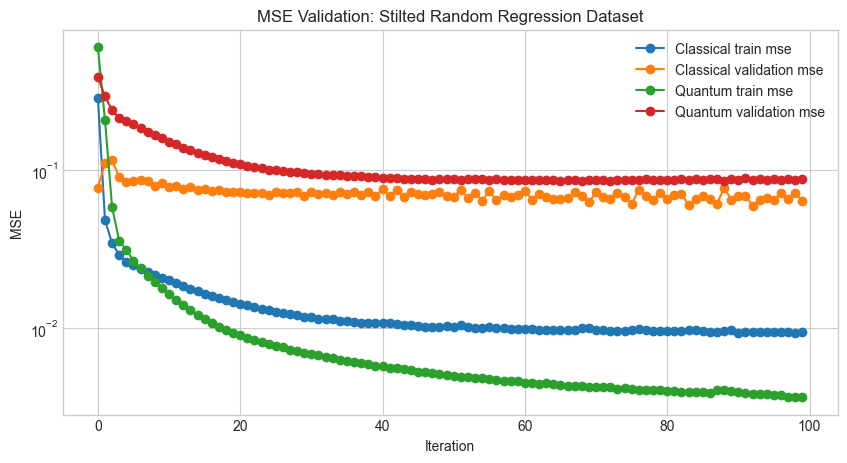

In [1336]:
#docs_infra: no_execute

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10,5))
plt.plot(classical_history.history['mean_squared_error'], label='Classical train mse', marker='o')
plt.plot(classical_history.history['val_mean_squared_error'], label='Classical validation mse',marker='o')
plt.plot(pqk_history.history['mean_squared_error'], label='Quantum train mse',marker='o')
plt.plot(pqk_history.history['val_mean_squared_error'], label='Quantum validation mse',marker='o')
plt.yscale("log")
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Validation: Stilted Random Regression Dataset')
plt.legend(loc='best')

In [1307]:
print(x_train_pqk.shape)

x_train_pqk_reshaped = np.array(x_train_pqk).reshape(-1,(np.array(x_train_pqk).shape[1]* np.array(x_train_pqk).shape[2]) )
x_test_pqk_reshaped = np.array(x_test_pqk).reshape(-1,(np.array(x_test_pqk).shape[1]* np.array(x_test_pqk).shape[2]) )
x_train_pqk_reshaped.shape

(425, 11, 3)


(425, 33)

In [64]:
print(x_test_pqk_reshaped.shape)

(155, 27)


In [65]:
import pickle as pkl

d = [x_train_pqk, x_test_pqk, x_train, x_test, y_train_new, y_test_new]

with open("stilted_data_housing.pkl", "wb") as output_file:
    pkl.dump(d, output_file)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#clf = LinearRegression()
clf = GaussianProcessRegressor(kernel=RBF())

clf.fit(x_train_pqk_reshaped, y_train_new)
y_pred = clf.predict(x_test_pqk_reshaped)

In [ ]:
print(mean_squared_error(y_test_new, y_pred))

In [ ]:
clf.fit(x_train, y_train_new)
y_pred = clf.predict(x_test)

In [ ]:
print(mean_squared_error(y_test_new, y_pred))

ModuleNotFoundError: No module named 'qiskit'